# Análise Nodal com Fontes de Tensão

Jupyter Notebook desenvolvido por [Gustavo S.S.](https://github.com/GSimas)

Um supernó é formado envolvendo-se uma fonte de tensão (dependente
ou independente) conectada entre dois nós que não são de referência e
quaisquer elementos conectados em paralelo com ele.

![](http://i.imgur.com/spG0j11.png)

**Um supernó pode ser
considerado uma superfície que
engloba a fonte de tensão e seus
dois nós.**

Observe as seguintes propriedades de um supernó:

1. A fonte de tensão dentro do supernó fornece uma equação de restrição necessária para encontrar as tensões nodais.
2. Um supernó não tem nenhuma tensão própria.
3. Um supernó requer a aplicação tanto da LKC como da LKT.

** Exemplo 3.3**

Para o circuito apresentado na Figura 3.9, determine as tensões nodais.

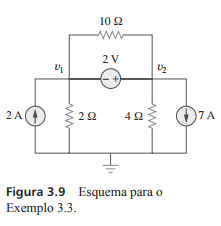

In [16]:
print("Exemplo 3.3")
import numpy as np
from sympy import *

Vsource = 2
Csource1 = 2
Csource2 = 7
R1 = 2
R2 = 4
R3 = 10

#i1 = v1/R1 = v1/2
#i2 = v2/R2 = v2/4
#i1 + i2 + 7 = 2 => i1 + i2 = -5
#v2 - v1 = 2
#v1/2 + v2/4 = -5 => (v2 - 2)/2 + v2/4 = - 5
#3v2/4 = -4
v2 = -16/3
v1 = v2 - 2

print("V1:", v1, "V")
print("V2:", v2, "V")

Exemplo 3.3
V1: -7.333333333333333 V
V2: -5.333333333333333 V


** Problema Prático 3.3**

Calcule v e i no circuito da Figura 3.11.

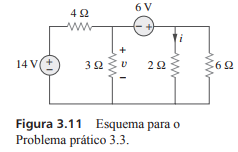

In [29]:
print("Problema Prático 3.3")

Vsource1 = 14
Vsource2 = 6

#v2 - v = 6

#i1 = i2 + i + i3

#i1 = (14 - v)/4
#i2 = v/3
#i = v2/2
#i3 = v2/6

#7/2 - v/4 = v/3 + 3 + v/2 + 1 + v/6 => 13v/12
v = (-1/2)*12/13
v2 = v + 6
i = v2/2
print("Valor de v:",v,"V")
print("Valor de i:",i,"A")

Problema Prático 3.3
Valor de v: -0.46153846153846156 V
Valor de i: 2.769230769230769 A


** Exemplo 3.4**

Determine as tensões nodais no circuito da Figura 3.12.

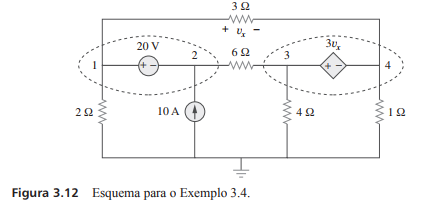

In [13]:
print("Exemplo 3.4")

import numpy as np

R1 = 2
R2 = 6
R3 = 4
R4 = 1
Rx = 3

#i1 = v1/R1 = v1/2
#i2 = (v2 - v3)/R2 = (v2 - v3)/6
#i3 = v3/R3 = v3/4
#i4 = v4/R4 = v4
#ix = vx/Rx = vx/3

#i1 + i2 + ix = 10
#i2 + ix = i3 + i4

#(v1 - v2) = 20
#(v3 - v4) = 3vx
#(v1 - v4) = vx
#(v2 - v3) = vx - 3vx - 20 = -2vx - 20

#v1/2 + (-2vx - 20)/6 + vx/3 = 10 => v1/2 = 40/3
v1 = 80/3
v2 = v1 - 20

#v3 - v4 -3vx = 0
#-v4 - vx = -80/3
    #-3v4 -3vx = -80
#-v3 + 2vx = - 80/3
    #-3v3 + 6vx = -80

#i2 + ix = i3 + i4
    #=> (v2 - v3)/6 + vx/3 = v3/4 + v4
    #=> -5v3/12 -v4 + vx/3 = -10/9
    #=> -15v3 -36v4 + 12vx = -40

coef = np.matrix('1 -1 -3;0 -3 -3;-15 -36 12')
res = np.matrix('0;-80;-40')
V = np.linalg.inv(coef)*res

#10/9 - (20/3 + 2vx + 20)/6 + vx/3 = (20/3 + 2vx + 20)/4 + 80/3 - vx
#7vx/6 = -10/3 + 5/3 + 5 + 80/3
#7vx/6 = 30
vx = 180/7
v4 = v1 - vx
v3 = v2 + 2*vx + 20
print("V1:", v1, "V")
print("V2:", v2, "V")
print("V3:", float(V[0]), "V")
print("V4:", float(V[1]), "V")
print("Vx:", float(V[2]), "V")

Exemplo 3.4
V1: 26.666666666666668 V
V2: 6.666666666666668 V
V3: 173.33333333333337 V
V4: -46.66666666666668 V
Vx: 73.33333333333334 V


**Problema Prático 3.4**

Determine v1, v2 e v3 no circuito da Figura 3.14 usando análise nodal.

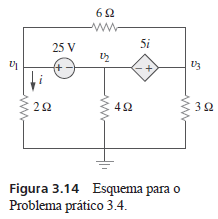

In [24]:
print("Problema Prático 3.4")

#i = v1/2
#i2 = v2/4
#i3 = v3/3
#i4 = (v1 - v3)/6

#(v1 - v3) = 25 - 5i
    #(v1 - v3) = 25 - 5v1/2
    #7v1/2 - v3 = 25
    #7v1 - 2v3 = 50
#(v1 - v2) = 25
#(v3 - v2) = 5i = 5v1/2
    #-5v1/2 -v2 + v3 = 0
    #-5v1 -2v2 + 2v3 = 0
    
#organizando
#7v1 - 2v3 = 50
#v1 - v2 = 25
#-5v1 -2v2 + 2v3 = 0

#i + i2 + i4 = 0
    #=> v1/2 + v2/4 + (v1 - v3)/6 = 0
    #=>2v1/3 + v2/4 - v3/6 = 0
    #=> 8v1 + 3v2 - 2v3 = 0
#i2 + i3 = i4
    #=> v2/4 + v3/3 = (v1 - v3)/6
    #=>-v1/6 + v2/4 + v3/3 = 0
    #=> -2v1 + 3v2 + 4v3 = 0
#i + i2 + i3 = 0
    #=>v1/2 + v2/4 + v3/3 = 0
    #=>6v1 + 3v2 + 4v3 = 0

coef = np.matrix('1 -1 0;6 3 4;-5 -2 2')
res = np.matrix('25; 0; 0')
V = np.linalg.inv(coef)*res
print("Valor de v1:",float(V[0]),"V")
print("Valor de v2:",float(V[1]),"V")
print("Valor de v3:",float(V[2]),"V")

Problema Prático 3.4
Valor de v1: 7.608695652173912 V
Valor de v2: -17.391304347826086 V
Valor de v3: 1.6304347826086956 V
